In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv


# Types of Transformations

1. Standardization and Normalization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Quantiles
4. Transformations


*     logarithmic transformation
*     reciprocal transformation
*     square root transformation
*     exponential transformation
*     boxcox transformation


# Standardization
Centering the variables to zero.
z=(x-x_mean)/std

In [2]:
#taking only selected numeric data
df=pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
#check for null values in the dataset
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
#imputing the null values in age column using median
df['Age'].fillna(df.Age.median(),inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [7]:
#call Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [8]:
#applying StandardScaler fit transform method
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [10]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

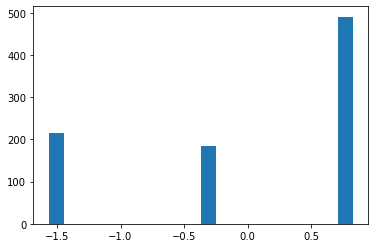

In [12]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

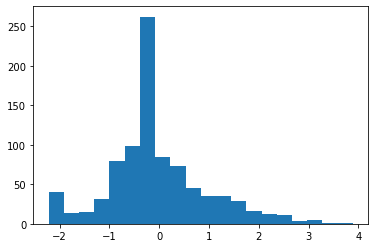

In [13]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

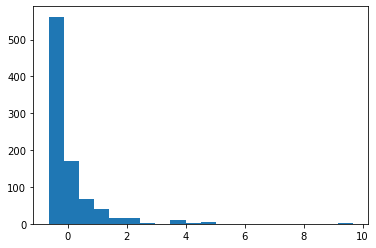

In [14]:
plt.hist(df_scaled[:,3],bins=20)

# Min Max scaling
Min Max scaling scales the values between 0 to 1.
> **x_scaled= (x-min(x))/(max(x)-min(x)**

In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

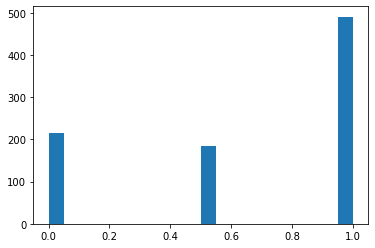

In [16]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

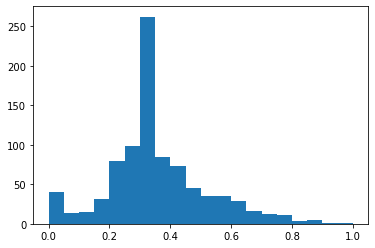

In [17]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

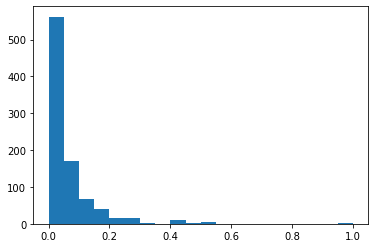

In [18]:
plt.hist(df_minmax['Fare'],bins=20)

# Robust scaler
It is used to scale the feature to median and quantiles. it is more robust to outliers.

**IQR = 75th quantile - 25th quantile**

**x_scaled = (x - x.median)/ IQR**

In [19]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

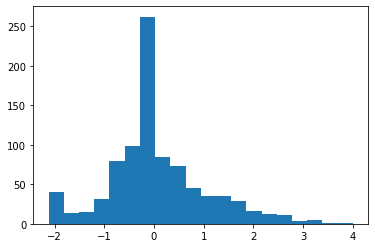

In [20]:
plt.hist(df_robust_scaler['Age'],bins=20)

# Guassian Transformation 

It is also called Normal Distribution.
* logarithmic transformation
* reciprocal transformation
* square root transformation
* exponential transformation
* boxcox transformation

In [21]:
df=pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv',usecols=['Age','Fare','Survived'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
#fill nan
df['Age']=df.Age.fillna(df.Age.median())

In [24]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [25]:
import scipy.stats as stats
import pylab

In [26]:
#if you want to check whether data is guassian or normal distributed
#we use Q-Q plot
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

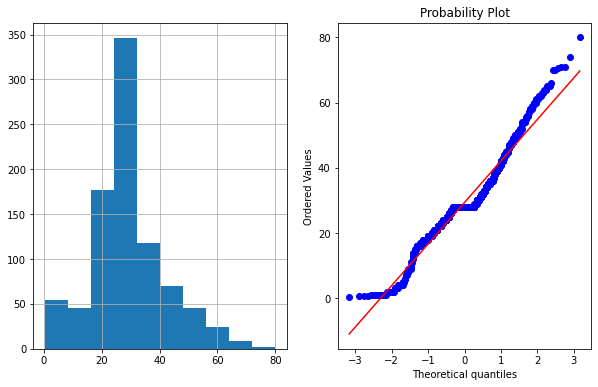

In [27]:
plot_data(df,'Age')
#A data is normally distributed if all points are on line in Q-Q plot

# Logarithmic transformation

* it work better if your data is right skwed or left skewed

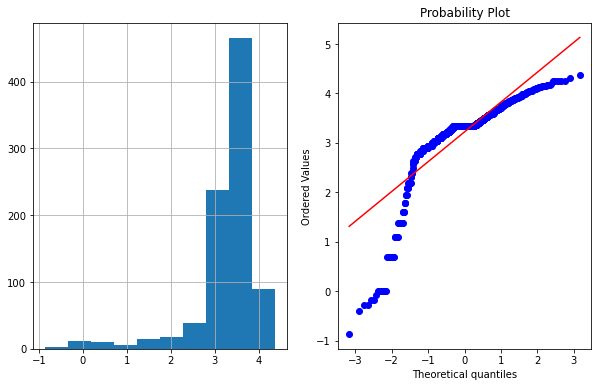

In [28]:
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')
#it is not suitable for making it normal distributed

**Reciprocal transformation**

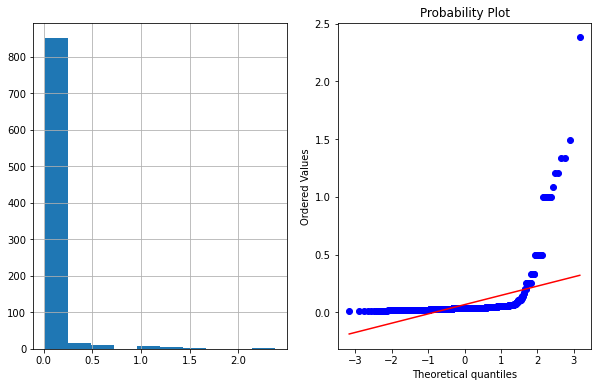

In [29]:
df['Age_rec']=1/df['Age']
plot_data(df,'Age_rec')

**Square root transformation**

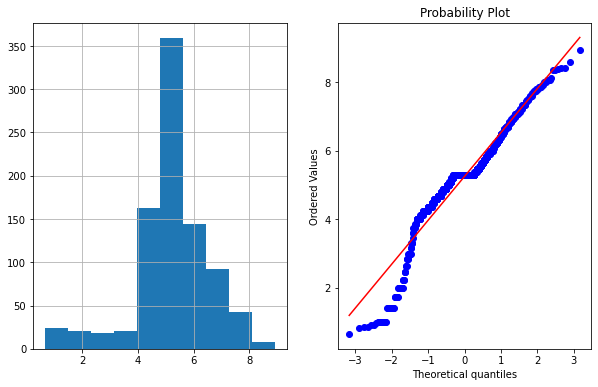

In [30]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

**Exponential Transformation**

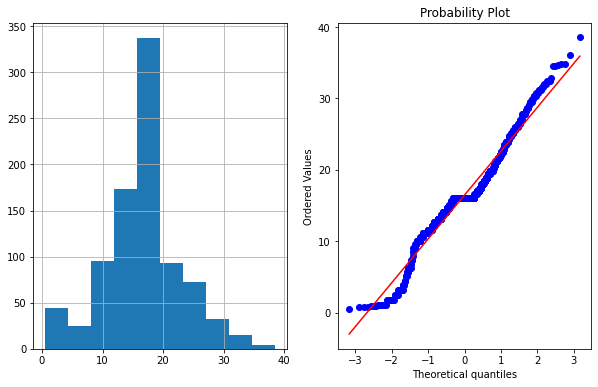

In [31]:
df['Age_exp']=df.Age**(1/1.2)
plot_data(df,'Age_exp')

**Boxcox transformation**

In [32]:
df['Age_boxcox'],parameters=stats.boxcox(df['Age'])
plot_data(df,'Age_boxcox')

NameError: name 'stat' is not defined

In [ ]:
!pip install jovian --upgrade
import jovian

In [ ]:
jovian.commit(project='Normalization and standardization')